# Lab 2

### Part 1

In [2]:
from EigenClass import EigenClass
import numpy as np

matrix = np.array([
  [-1, 0, 0],
  [1, 4, 4],
  [-1, -2, -2]
])

print(EigenClass.get_eigen(matrix, True)[1])


1: [0. 0. 0.] == [ 0.  0. -0.]
2: [ 0.         -1.78885438  0.89442719] == [ 0.         -1.78885438  0.89442719]
3: [-0.57735027  0.57735027 -0.57735027] == [-0.57735027  0.57735027 -0.57735027]
[[ 0.          0.          0.57735027]
 [ 0.70710678 -0.89442719 -0.57735027]
 [-0.70710678  0.4472136   0.57735027]]


### Part 2

(400, 600, 3)
(400, 600)


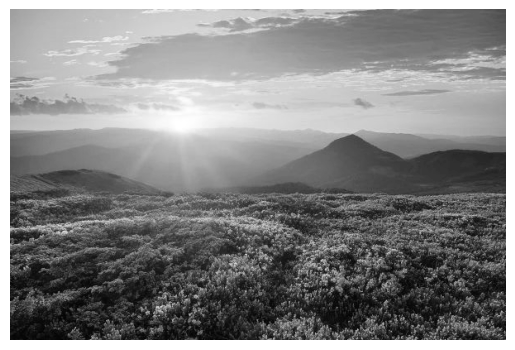

In [23]:
import matplotlib.image as mimage
import matplotlib.pyplot as plt

import numpy as np
from sklearn.decomposition import PCA

# reading image
img = mimage.imread('./img/1.jpg')
print(img.shape)

# greying image
grey_img = img.sum(axis=2)
print(grey_img.shape)

# covariation matrix
mean_vector = np.mean(grey_img, axis=0)
cov_matrix = np.cov(grey_img - mean_vector, rowvar=False)

# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(grey_img)

# reconstruction
X_reconstructed = pca.inverse_transform(X_pca)

# display image
plt.axis('off')
plt.imshow(grey_img, cmap='gray')


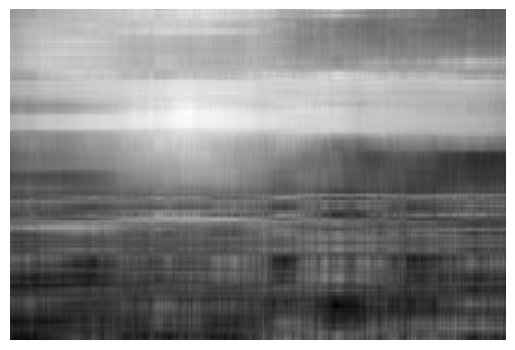

In [24]:
plt.axis('off')
plt.imshow(X_reconstructed, cmap='gray')

### Part 3

In [27]:
import numpy as np
import random

def encrypt_message(message, key_matrix):
  message_vector = np.array([ord(char) for char in message])

  eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
  diag_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))

  encrypted_vector = np.dot(diag_key_matrix, message_vector)
  return encrypted_vector

def decrypt_message(encrypted_vector, key_matrix):
  # message = diag_key_matrix-1 * encrypted_vector
  eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
  diag_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
  
  message_vector = np.dot(np.linalg.inv(diag_key_matrix), encrypted_vector)
  message = [chr(int(np.round(char))) for char in message_vector]

  return ''.join(message)


message = 'Hello there!'
key_matrix = np.random.randint(0, 256, (len(message), len(message)))

encrypted = encrypt_message(message, key_matrix)
# print(encrypted)

decrypted = decrypt_message(encrypted, key_matrix)
print(decrypted)

Hello there!


C:\Users\Yaroslav\AppData\Local\Temp\ipykernel_17344\4113551095.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  message = [chr(int(np.round(char))) for char in message_vector]
